In [14]:
# Importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import solar_system_ephemeris, EarthLocation, get_sun

# Heliocentrism (Continued)

The Copernican model of the Solar system could easily account for the retrograde motion of the planets, which was a major failing of any geocentric models. An example of how the sudden reversals in a planets direction of motion across the night sky is shown in the below Figure. The numbers indicate different observing times, starting from 1 and ending at 6. Between observation 3 and 4, Mars undergoes a "reversal" in the night sky.

![Retrograde motion explained](Images/Figure_1.png)

Heliocentrism also allows us to calculate the **true** (sidereal) orbital periods of the planets. Consider a planet which is further from Earth than the Sun. The time between successive conjunctions (the planet being 180 degrees away from the sun in the sky) is S, the synodic period. The sidereal period of the planet, P, can then be calculated using

$$
    \frac{1}{S} = \frac{1}{P_\oplus}-\frac{1}{P}
$$

where $P_\oplus$ is the Earth's synodic period of 365.256308 days. Once P has been determined, Kepler's laws can then be used the separation between the Sun and the planet. While excellent elegant in explaining the motion of the planets, the heliocentric model was as accurate as the geocentric model when it came to predicting the positions of bodies in the night sky - mainly because Copernicus still required  that planets orbit in perfect circles. Epicycles were introduced into the Copernican model in order to have the predicted observations match positions.

It wasn't until Kepler derived his laws and incorporated eccentricties into the orbits of planets that the accuraacy of positions increased by several orders of magnitudes, helping solidify the heliocentric model as the correct model.

# Positional Astronomy

Now that we've explored the various models for the solar system, and convinced ourselves that the Heliocentric model is the way to go, let's discuss positional astronomy - that is, assignging co-ordiantes to objects which are understandable from various locations on the Earths surface and at different times. There are several things we need to account for, such as the rotation of the Earth, the orbit of the Earth around the Sun, and the precession of the Earths axis. 

To start, we're going to use a geocentric frame as shown below.

![Celestial Sphere](Images/Figure_2.png)

In this coordinate system, and due to the Earths tilt of 23.5 degrees relative to the orbital plane, the sun follows a path throughout the year known as the **ecliptic**. The below piece of code shows the position of the sun on the celestial sphere when viewed from Earth throughout the year. Note that the x-axis is inverted. This is because RA is measured Eastwards from the vernal equinox

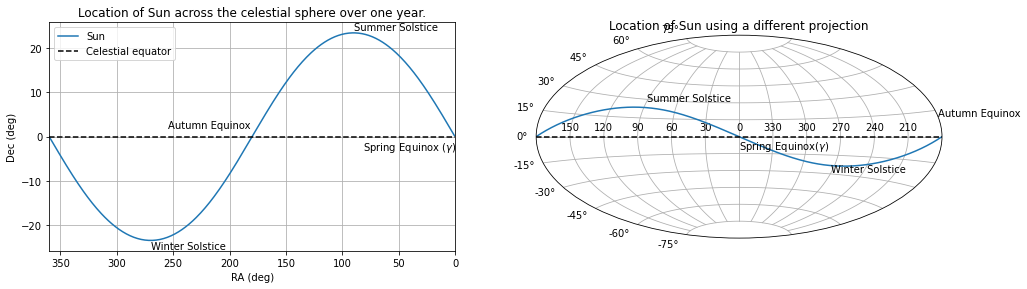

In [82]:
times = np.arange(57192,57192+370,1) #This is just arbitrary MJDs I've chosen, sampled at 5 day intervals.
ts = Time(times,format='mjd',scale='utc') #Convering the MJDs to a Time format which Astropy can read.
with solar_system_ephemeris.set('builtin'):
    sun = get_sun(ts) # Get the location of the Sun
    
ra_order = np.argsort(sun.ra)

#Finally, just sorting the RA and Dec so that the plot looks nice.
ra_rad_order = np.argsort(ra_rad)
ra_rad = ra_rad[ra_rad_order]
dec_rad = dec_rad[ra_rad_order]

plt.figure(figsize=(8*2,4.2))
plt.subplot(121)
plt.grid(True)
plt.title("Location of Sun across the celestial sphere over one year.")
plt.plot(sun.ra[ra_order],sun.dec[ra_order],'-', label="Sun") 
plt.axhline(0,color='k',ls='--', label="Celestial equator")
plt.ylabel("Dec (deg)")
plt.xlabel("RA (deg)")
plt.xlim(360,0) # Inverting the x-axis
plt.text(82,-3,r"Spring Equinox ($\gamma$)")
plt.text(90,24.0,"Summer Solstice")
plt.text(255,2,"Autumn Equinox")
plt.text(270,-25.5,"Winter Solstice")
plt.legend()

ax = plt.subplot(122, projection="aitoff")
ax.grid(True)
ax.set_title("Location of Sun using a different projection")
ax.plot(ra_rad*-1, dec_rad, '-') # Mollweide projection doesn't support axes which increase right to left, so we need to invert everything
ax.axhline(0,color='k',ls='--')
ax.text(0,-0.2,"Spring Equinox($\gamma$)")
ax.text(-np.pi/2,0.5,"Summer Solstice")
ax.text(np.pi/2,-0.5,"Winter Solstice")
ax.text(np.pi,0.2,"Autumn Equinox")
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210]) # Defining custom labels, as mollweide works in -180 degrees to 180 degrees (and we want 0 to 
ax.set_xticklabels(tick_labels, zorder = 15)
plt.show()

So, for any given object, it's position on the sky is given as:
- Declination ($\delta$) with respect to the celestial equator (equivalent to "Latitude")
- Right Ascension with ($\alpha$) respect to the Spring Equinox $\gamma$ (equivalent to "Longitude")